In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("data/advertising.csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
 data.shape

(200, 4)

In [8]:
data["total_spent"] = data["TV"] + data["Radio"] + data["Newspaper"]

In [9]:
data.head()

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


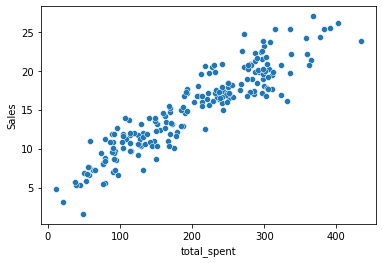

In [10]:
sns.scatterplot(data = data , x = "total_spent" , y = "Sales")
plt.show()

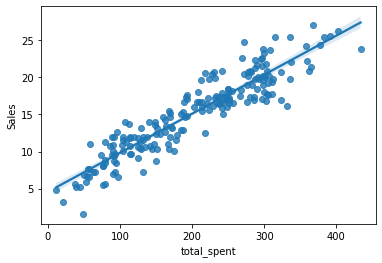

In [11]:
sns.regplot(data = data , x = "total_spent" , y = "Sales")
plt.show()

In [12]:
x = data["total_spent"]
y = data["Sales"]

In [13]:
params = np.polyfit(x , y , deg = 1 )

In [15]:
spend = np.linspace(0 , 500 , 100)
sales = params[0] * spend + params[1]

c:\Users\chait\.conda\envs\advertising\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


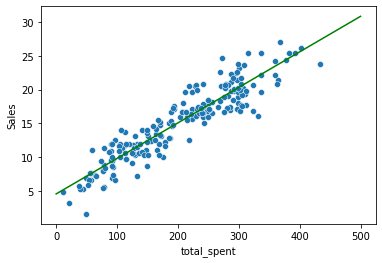

In [16]:
sns.scatterplot(x , y)
plt.plot(spend ,sales , color = 'g')
plt.show()

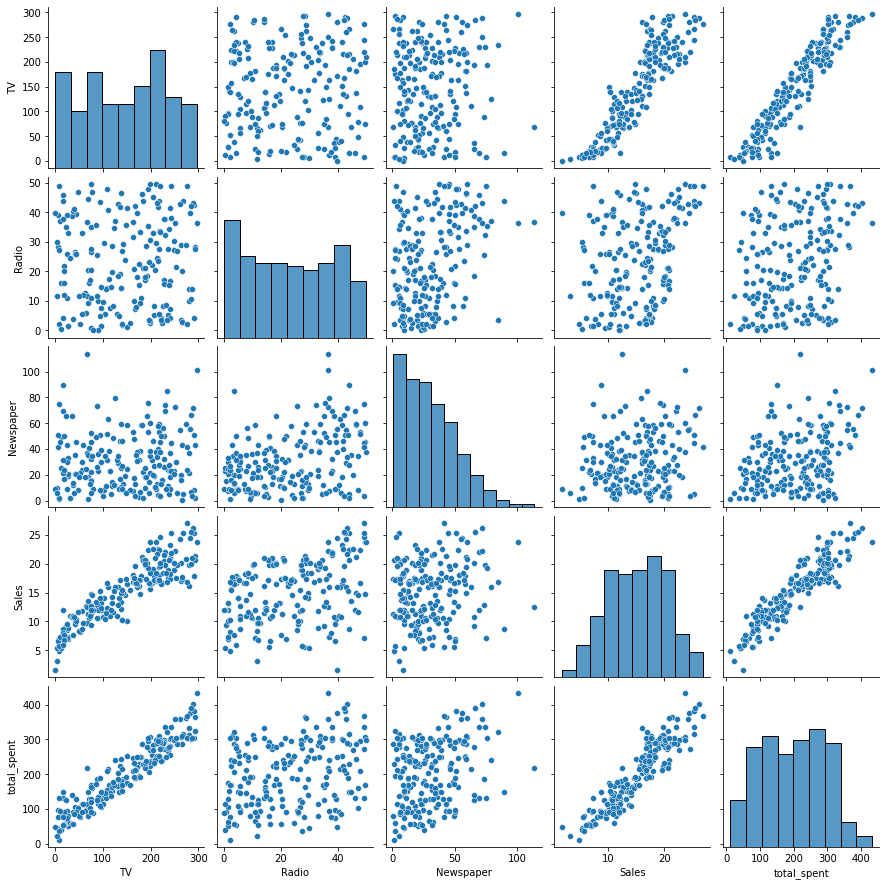

In [17]:
sns.pairplot(data)

In [18]:
X = data.drop(columns = ["total_spent" , "Sales"] )
Y = data["Sales"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , Y_train , Y_test = train_test_split(X ,  Y , random_state = 42)

In [21]:
X_train.shape

(150, 3)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train , Y_train)

LinearRegression()

In [25]:
Y_pred = regressor.predict(X_test)

In [26]:
regressor.score(X_test , Y_test)

0.9115647723992757

In [27]:
regressor.score(X_train , Y_train)

0.8957759851376041

In [28]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [29]:
mean_squared_error(Y_test , Y_pred)

2.4040674447118886

In [30]:
np.sqrt(mean_squared_error(Y_test , Y_pred)) ## RMSE

1.5505055448826646

<AxesSubplot:>

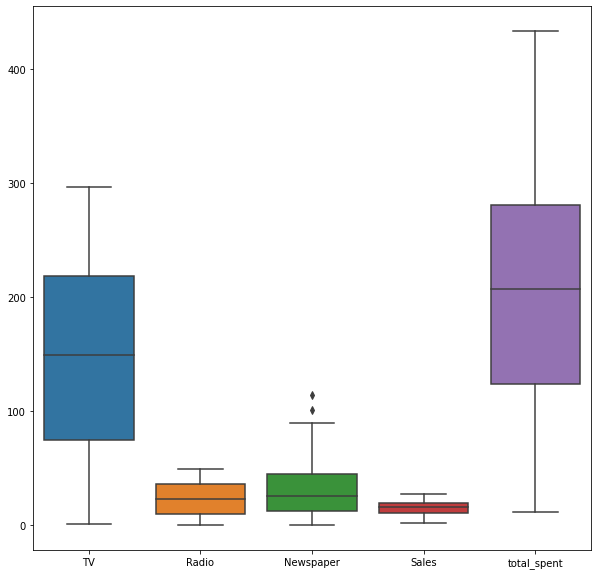

In [31]:
plt.figure(figsize=(10 , 10))
sns.boxplot(data = data)


In [32]:
mean_absolute_error(Y_test , Y_pred)

1.1199940713361771

In [33]:
r2_score(Y_test , Y_pred)

0.9115647723992757

<AxesSubplot:xlabel='Sales', ylabel='Count'>

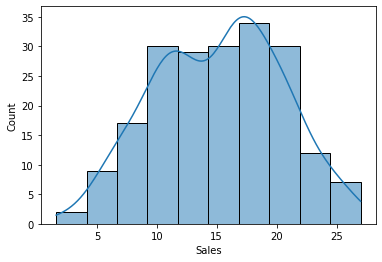

In [34]:
sns.histplot(data = data , x="Sales" , kde = True )

In [35]:
residual = Y_test - Y_pred

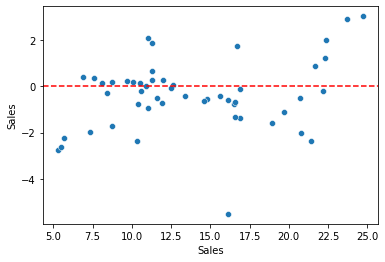

In [36]:
sns.scatterplot(x = Y_test , y = residual)
plt.axhline(y = 0 , color= "red" , ls = "--")

In [ ]:
sns.displot(residual , bins = 15, kde = True)